# Mini Project: Logistic Regression

Logistic Regression models the probability that a given input belongs to a certain class. It's suitable when the target variable is categorical and represents two classes (e.g., 0 or 1, True or False, Yes or No), although it can also be extended for problems with more than two classes. The key idea behind logistic regression is to model the relationship between the input variables (features) and the probability of the outcome.

In logistic regression, the linear combination of input features is transformed using a logistic function (also known as the sigmoid function), which ensures that the output is between 0 and 1. This output can be interpreted as the probability of the instance belonging to a particular class.

**Advantages of Logistic Regression:**

1. **Simple and Interpretable:** Logistic regression is a straightforward algorithm that's relatively easy to understand and interpret. The output is the probability of belonging to a certain class, and the coefficients associated with each feature provide insights into feature importance.

2. **Efficient for Small Datasets:** It works well with small datasets where the number of samples is not very large. It's less prone to overfitting in such cases compared to complex models.

3. **Works Well for Linearly Separable Data:** When the classes are separable by a linear decision boundary, logistic regression can perform quite well.

4. **Good Starting Point:** Logistic regression is often used as a starting point for understanding a classification problem. It can serve as a baseline model against which more complex algorithms can be compared.

5. **Regularization:** Logistic regression can be regularized to prevent overfitting. Regularization techniques like L1 (Lasso) and L2 (Ridge) regularization can be applied to control the complexity of the model.

6. **Probability Estimation:** Logistic regression not only provides class predictions but also outputs the probability of the prediction. This can be useful for decision-making in cases where the cost of misclassification varies.

However, it's important to note that logistic regression also has its limitations. It assumes a linear relationship between features and the log-odds of the target variable, which might not be suitable for highly complex relationships. Additionally, it might struggle with handling non-linear data without feature transformations. In such cases, more advanced techniques like decision trees, random forests, or neural networks might be more appropriate.

In this project you'll get some experience building a logistic regression model for the [Wisconsin Breast Cancer Detection dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). Note, the task of training a logistic regression model has largely been asbtracted away by libraries like Scikit-Learn. In this mini-project we'll focus more on model evaluation and interpretation.  


**Good to get a refresher on this, some of the videos and documents that we read went over A LOT.**


First, let's import all the libraries we'll be using.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

Logistic Regression, like many statistical methods, comes with certain assumptions about the underlying data. Here are the main assumptions associated with logistic regression:

1. **Binary Outcome:** Logistic regression is designed for binary classification problems, where the dependent variable (target) should have two categories or levels. If you have a multi-class problem, you would typically use multinomial logistic regression or other appropriate techniques.

2. **Independence of Observations:** The observations (samples) should be independent of each other. This means that the outcome of one observation should not be influenced by the outcome of another observation. This assumption is often met when the data is collected using random sampling or experimental designs.

3. **Linearity of Log-Odds:** The relationship between the log-odds of the outcome and the predictors should be linear. In other words, the log-odds of the outcome variable should change linearly with changes in the predictor variables. This assumption can be checked by examining scatter plots and residual plots.

4. **No Multicollinearity:** There should not be high multicollinearity among the predictor variables. Multicollinearity can make it difficult to determine the individual effect of each predictor on the outcome. Techniques like variance inflation factor (VIF) can be used to assess multicollinearity.

5. **Large Sample Size:** While logistic regression is generally more robust to violations of assumptions compared to linear regression, having a reasonably large sample size helps in obtaining stable and reliable parameter estimates.

6. **Sufficient Variability in the Outcome:** The outcome variable should exhibit variation across different values of the predictor variables. If all values of a predictor are the same within a level of the outcome, the model may not be able to estimate the effect of that predictor.

7. **No Extreme Outliers:** Extreme outliers can influence the estimation of coefficients and affect the overall performance of the model. It's a good practice to identify and handle outliers before fitting the model.

It's important to note that while these assumptions are important to understand, logistic regression is often used in real-world scenarios where some of these assumptions may not be perfectly met. In such cases, it's crucial to assess the impact of potential violations on the model's results and make informed decisions about the model's suitability and reliability.

If the assumptions are significantly violated, it might be worth considering other techniques like decision trees, random forests, or support vector machines, which might be more robust to certain types of data characteristics. One of the best ways to see if logistic regression is suitable for a problem is to simply train a logistic regression model and evaluate it on test data.

Here are your tasks:

1. Load the [breast cancer data](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) into a Pandas dataframe and create variables for the features and target.
2. Do a little exploratory data analysis to help familiarize yourself with the data. Look at the first few rows of data, for example. Generate some summary statistics for each feature. Look at the distribution of the target variable. Maybe create a pair-plot for some of the variables. Create a [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) of correlation between features. Is the multicollinearity assumption broken? Also, generate some boxplots to see how feature distributions change for each target. This part is a bit open-ended. Be creative!

In [28]:
# Load data and split into feature and target variables
from sklearn.datasets import load_breast_cancer
raw = load_breast_cancer()
df = pd.DataFrame(raw.data, columns=raw.feature_names)
df['target'] = raw.target
df.shape

(569, 31)

**30 features/columns**

In [29]:
# View first 5 rows of the data
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


**All Numbers!**

In [30]:
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


**Beautiful, no nulls to deal with**

In [31]:
# How frequently does the positive target occur?
target_counts = df['target'].value_counts()
target_counts

,count
target,
1,357
0,212


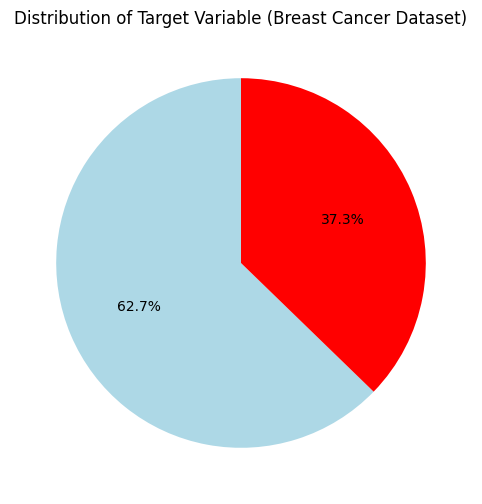

In [32]:
plt.figure(figsize=(8, 6))
# labels = ['Malignant (0)', 'Benign (1)']
colors = ['lightblue', 'red']

#plt.pie(target_counts.values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.pie(target_counts.values, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Target Variable (Breast Cancer Dataset)')
plt.show()

**This nit super balanced but not horrible either. I may try and balance have to balance this data set as its skewed towards Malignant(target=0)**



In [33]:
# Generate summary statistics for the data
# Exclude target, as it was showing up in later results but we don't care. Maybe we do care?
# Store this in memory so we can do some analysis on it, rather than just using our eyeballs
desc = df.iloc[:, :-1].describe()
desc

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Kinda hard to look at 30 columns to see if there are likely outliers. Quick inpsecton suggest some are good, some are not**

In [34]:
#Find columns that probably have a high number of outliers than others
mean_median_diff = abs(desc.loc['mean'] - desc.loc['50%'])
potential_outliers = mean_median_diff.nlargest(5) #Top 5 worst mean-median diffs
potential_outliers

,0
worst area,194.083128
mean area,103.789104
area error,15.807079
worst perimeter,9.601213
mean perimeter,5.729033


**I am actually unsure WHAT having a large number of outliers really tells us about data quality, but I remember this was a comment that I noted in one of the videos. I think it means the distribution may be quite uneven. Which isn't inherently a problem for a dataset, but is when using linear regression**

In [35]:
#Calculating the most variable was recommended by a different video I found while browing LinkedIn training videos
most_variable = (desc.loc['std'] / desc.loc['mean']).nlargest(5)
most_variable

,0
area error,1.127771
concavity error,0.946458
mean concavity,0.897753
mean concave points,0.793204
worst concavity,0.766470


**I think this means that these features/columns are good candidates for training. But actually, I think it probably depends. Highly variable seems good but it could also imply noise. Not sure how to discern**

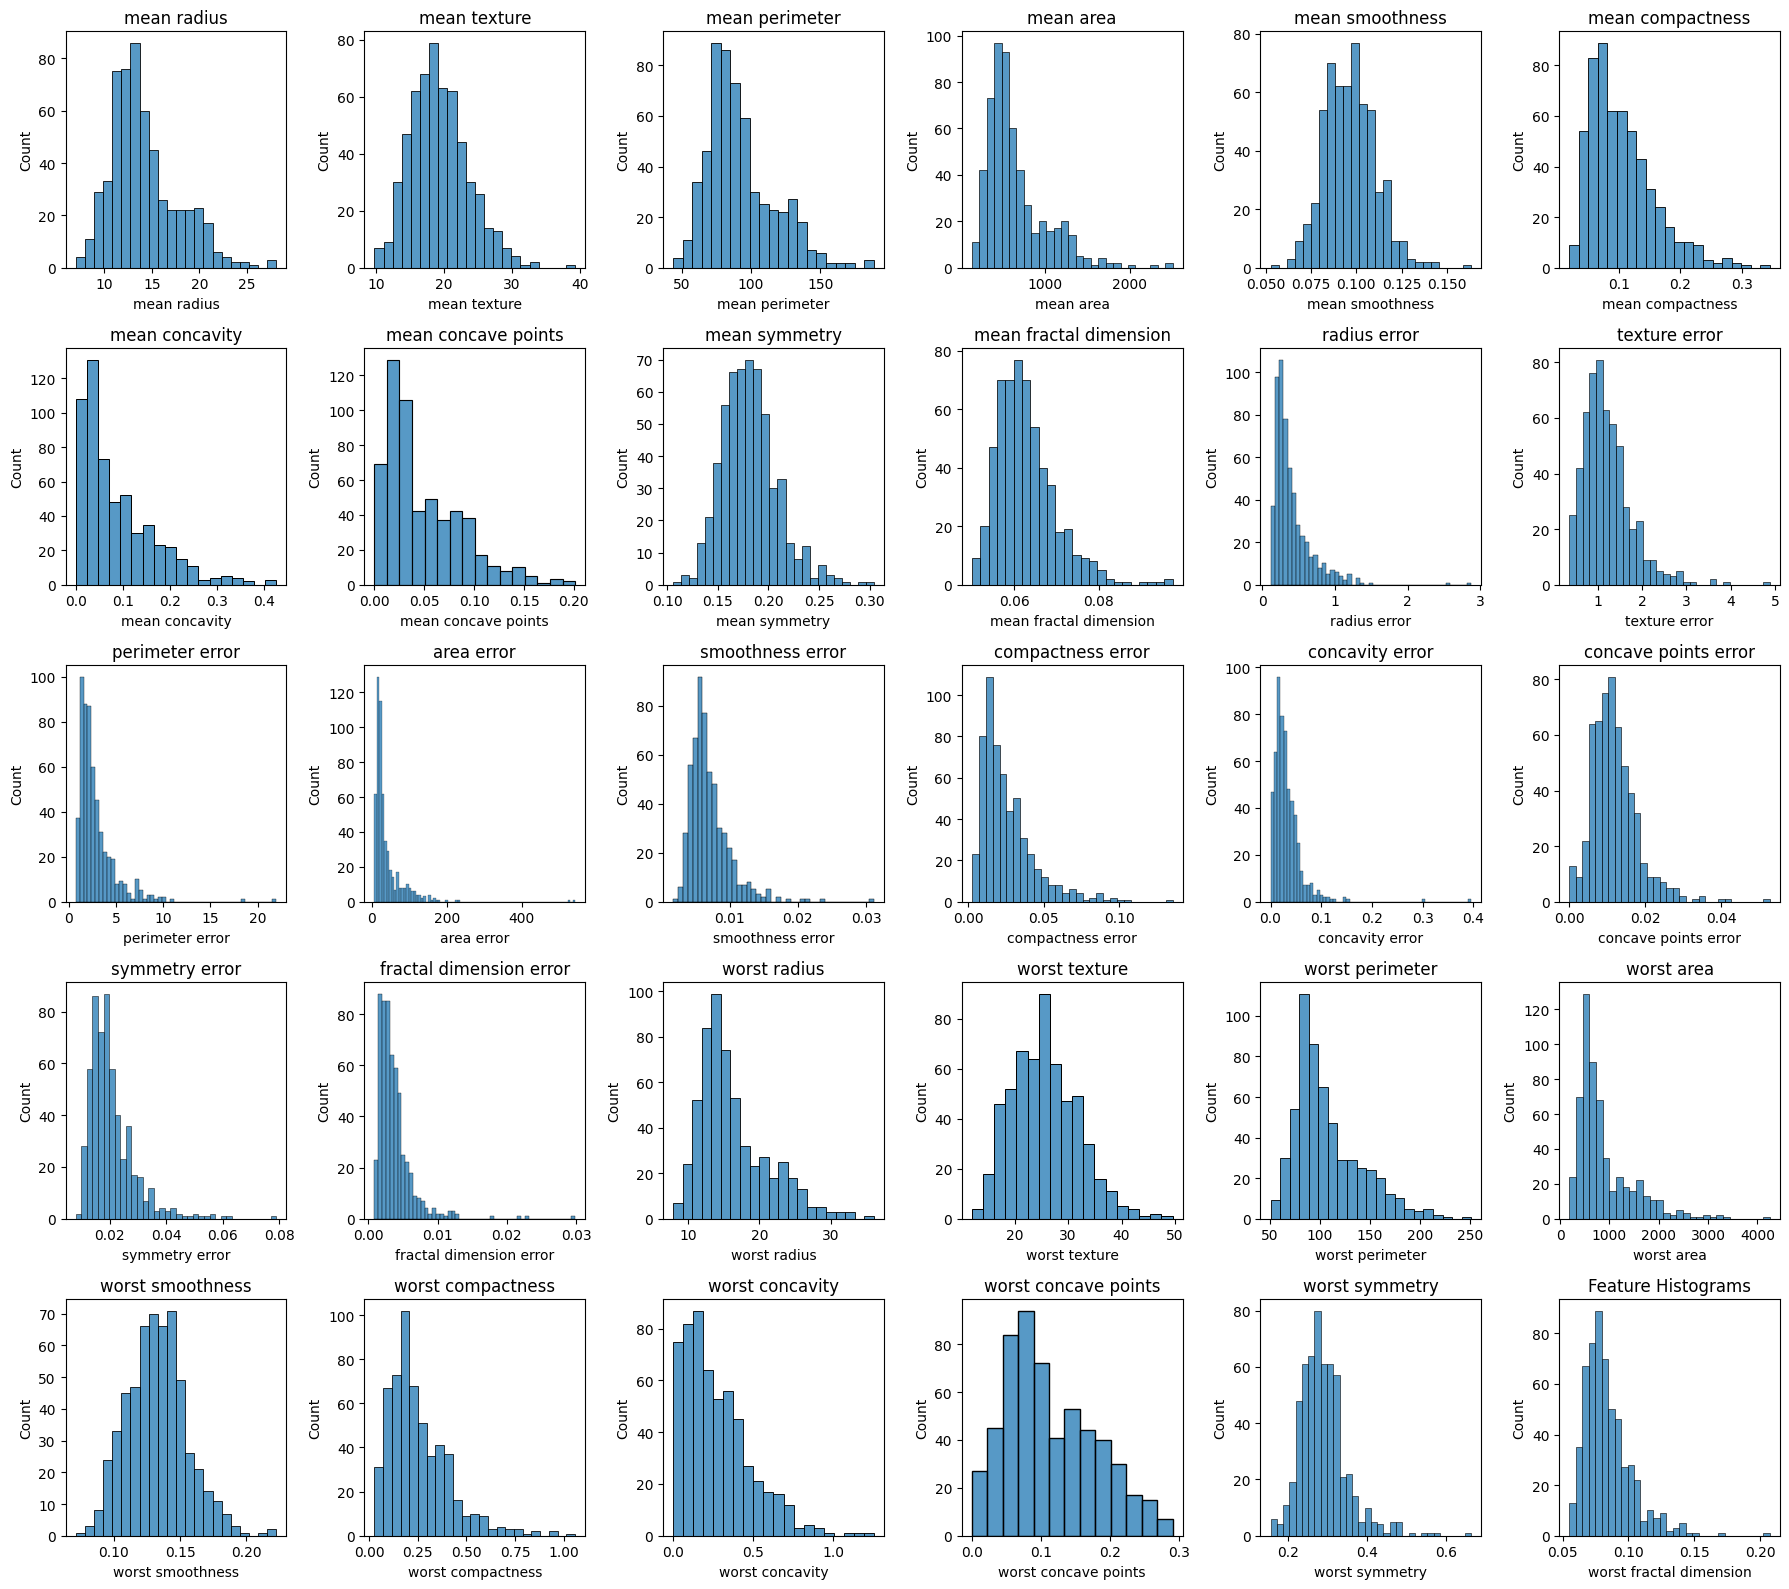

In [36]:
#Let's plot the features histograms to showcase distributions
feature_names = raw.feature_names
fig, axes = plt.subplots(5, 6, figsize=(18, 16))
axes = axes.flatten()

for i, feature in enumerate(feature_names):
    sns.histplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(feature)

plt.title('Feature Histograms')
plt.tight_layout()
plt.show()



**This data set really looks good. No nulls, nice distributions. Highly variable. But I think the scales are very different which I think means we need to do feature scaling for Linear Regression Models. Also, you can see several of the features have outliers of significant quantity (worst smoothness, mean radius, mean perimeter). Not sure what we do about those, if they should be removed from the model training set**
**Although it might just be best to make a model and see how it performs and see how each feature contributes**

<Figure size 1200x1000 with 0 Axes>

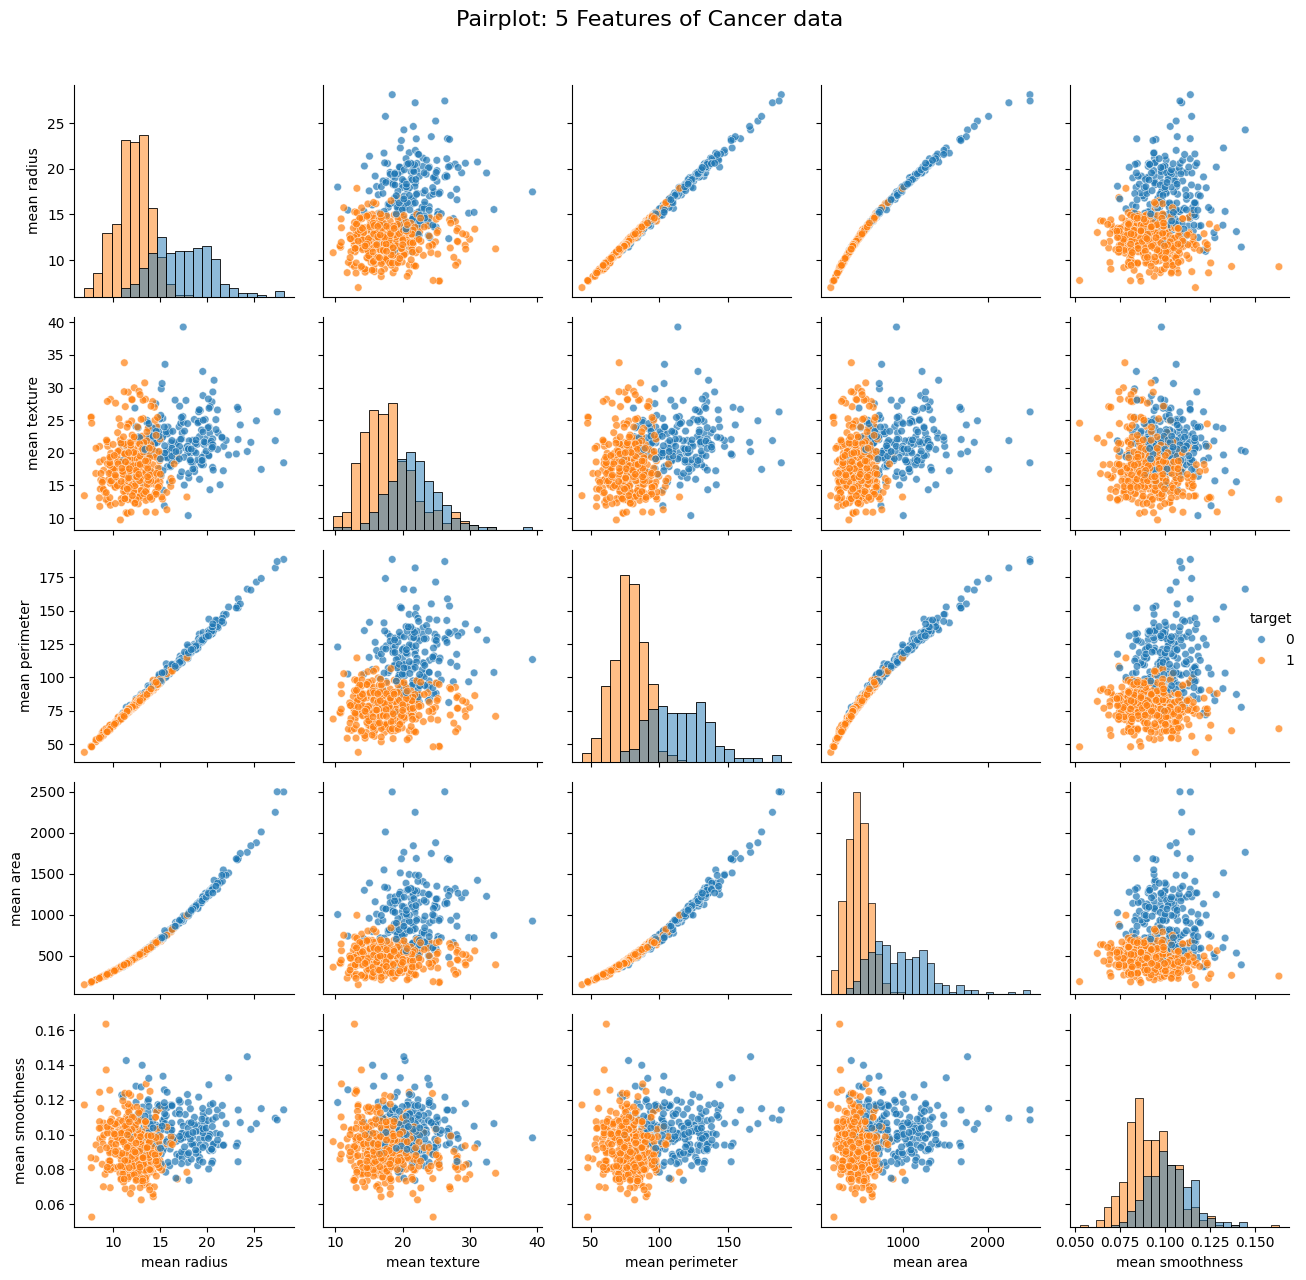

In [37]:
# Create a pairplot for the first few features

# We know the first 5 features are numerical, so this is safe to do
# Also, this way I can pick features by name later if I want to poke around
# Using copy just in case I mess up the subset data it won't cause problems in df
df_subset = df[['mean radius', 'mean texture', 'mean perimeter',
                       'mean area', 'mean smoothness']].copy()
df_subset['target'] = df['target']  # Add target for color coding

# Took a suggestion I saw in a separate video I saw to show
# the diagonal as a histogram, AND to color code the points by target to show
# distribution of each data set more easily. Nifty.
plt.figure(figsize=(12, 10))
pairplot = sns.pairplot(df_subset,
                       hue='target',
                       diag_kind='hist',
                       plot_kws={'alpha': 0.7, 's': 30}
                        )

pairplot.fig.suptitle('Pairplot: 5 Features of Cancer data',
                      y=1.02, fontsize=16)

plt.tight_layout()

Some have a very high correlation. Lots of blobs too though

But now that I added color, that is REALLY interesting. The fact that things are clustered, not mixed between 0 and 1 targets suggests to me that this is a good data set for making ML predictions. I mean, each of these 5 for all pairs are very clustered.
If this was a real dataset, I would probably look at more fields.

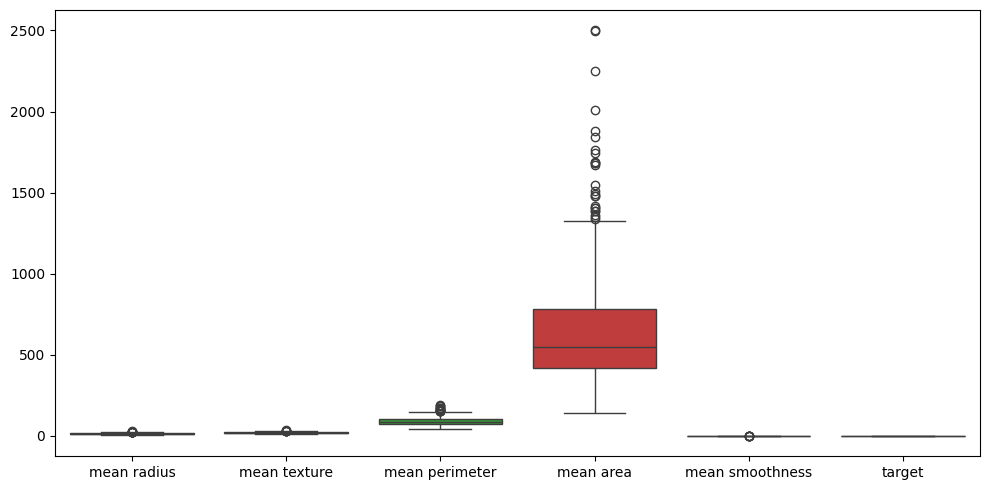

In [38]:
#Trying to make a box plot to see what it tells us
plt.figure(figsize=(10, 5))

sns.boxplot(data=df_subset)
plt.tight_layout()
plt.show()

**Not super helpful since the scale of mean area is so different. I guess it told us that. But we already knew that we would probably be doing some feature scaling**

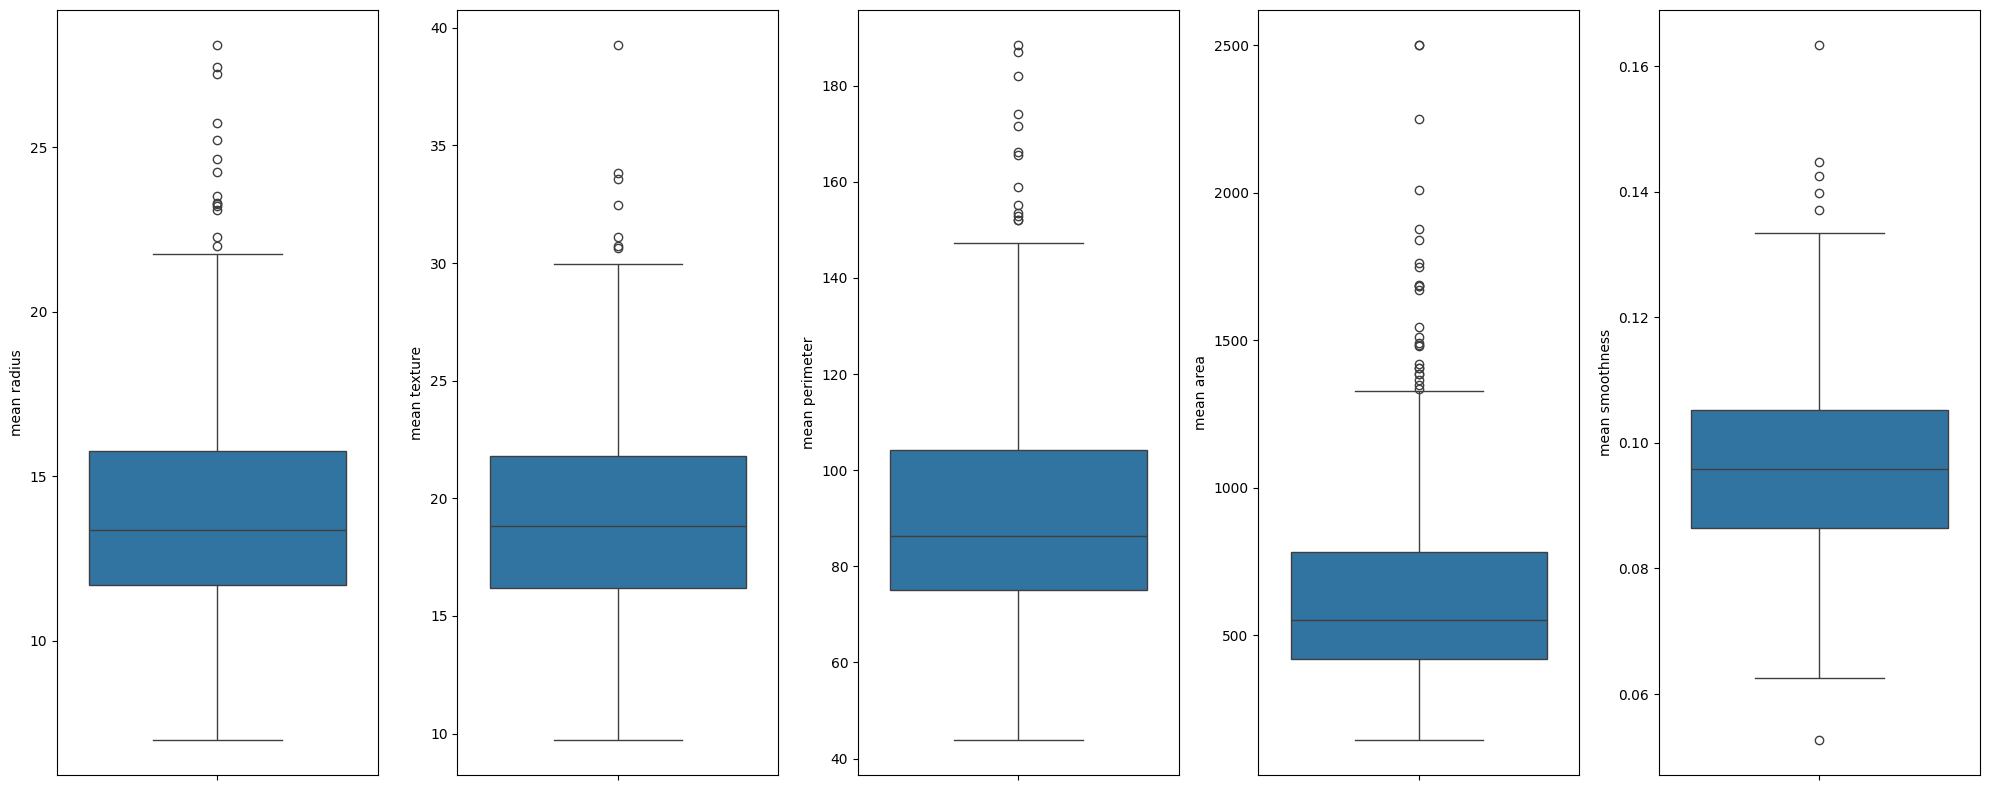

In [39]:
#Let's loop through the features to make indivudally scaled plots
fig, axes = plt.subplots(1, 5, figsize=(20, 8))
feature_names = df_subset.columns[:5]

for i, feature in enumerate(feature_names):
    sns.boxplot(data=df, y=feature, ax=axes[i])

plt.tight_layout()
plt.show()

**That is better. Still, as I am new to this, I am not sure certain what the can tell me other than what we already knew**

In [40]:
# Create a correlation coefficeint heatmap
corr = df.corr()
corr

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


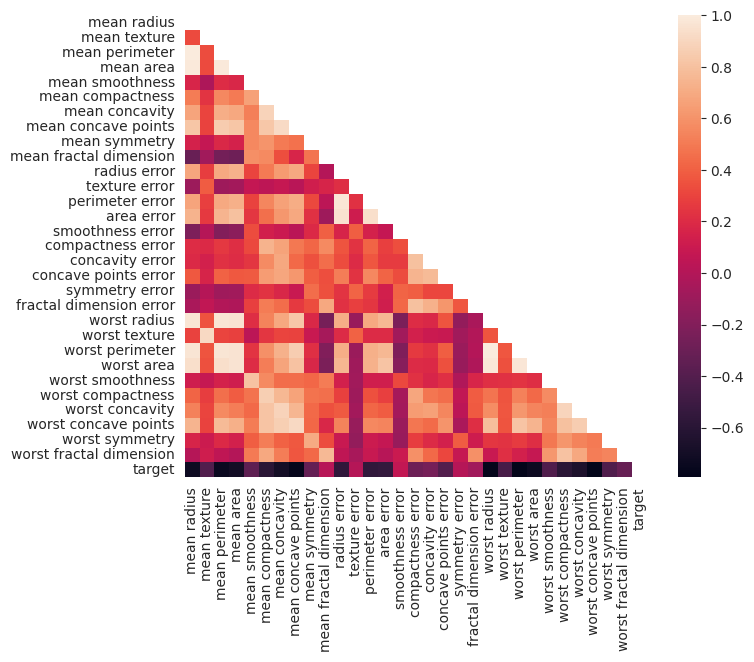

In [41]:
# Heatmap but chop it
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 6))
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True)

So, high coorelation with mean area and mean radius and mean perimeter, which you might expect.
Also interesting, high coorelation with those three and worst_perimeter and worst area.
I read up on this data set and what these numbers are, and it is not that surprising that the tumor area is highly correlated with the worst area since the mean is calcuated from 3 measurements, including worst.
Not sure what else this tells us though.
It also appears that errors are all related as well.


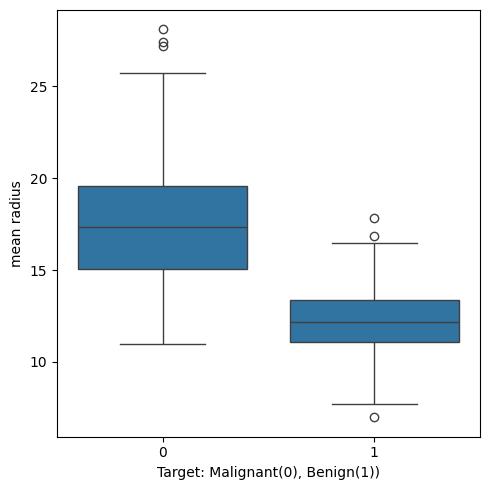

In [42]:
# Create a boxplot for mean radius by target type
plt.figure(figsize=(5, 5))

sns.boxplot(data=df, x='target', y='mean radius')
# Add a title b/c it's confusing w/o it
plt.xlabel('Target: Malignant(0), Benign(1))')
plt.tight_layout()
plt.show()

**This seems good, nice difference in data between targets**

With a better feel for the data, it's time to attempt to build a logistic regression model.

1. Use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to create a training and test sets for the data.
2. Use [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to train a model on the training data. Make sure you understand the inputs to the model. Try using the "liblinear" solver here.

In [43]:
# Split data into training and test sets 80/20
X_train, X_test, y_train, y_test = train_test_split(df[raw.feature_names], df['target'], random_state=0, test_size=0.20)

In [44]:
print(f"Training Data shape {X_train.shape}, Test data shape {X_test.shape}")
pcnt = X_train.shape[0]/(X_train.shape[0]+X_test.shape[0])*100
print(f"Training data comprises {pcnt}% of total data")

Training Data shape (455, 30), Test data shape (114, 30)
Training data comprises 79.96485061511423% of total data


In [45]:
#Let's train this sucker (not scaled, just out of interest)
clf = LogisticRegression(solver='liblinear')
clf.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [46]:
# Evaluate the model
print('prediction', clf.predict(X_test[0:15]))
print('probability', clf.predict_proba(X_test[0:15]))
score = clf.score(X_test, y_test)
score

prediction [0 1 1 1 1 1 1 1 1 1 1 1 1 0 1]
probability [[9.92132848e-01 7.86715160e-03]
 [3.03789115e-02 9.69621088e-01]
 [2.11935255e-03 9.97880647e-01]
 [1.83301449e-01 8.16698551e-01]
 [8.13661491e-05 9.99918634e-01]
 [2.95332153e-03 9.97046678e-01]
 [7.17281833e-03 9.92827182e-01]
 [1.65358244e-03 9.98346418e-01]
 [3.50266821e-02 9.64973318e-01]
 [2.11942533e-04 9.99788057e-01]
 [3.87697168e-01 6.12302832e-01]
 [1.58476287e-01 8.41523713e-01]
 [3.97984001e-03 9.96020160e-01]
 [7.66682309e-01 2.33317691e-01]
 [1.96309741e-01 8.03690259e-01]]


0.956140350877193

*95.6% without scaling. Interesting*

In [47]:
#Finally, train this sucker

#Scale the Data b/c scales vary widely feature to feature
scaler = StandardScaler()
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Train my first model!
clf = LogisticRegression(solver='liblinear')
clf.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

**Far less exciting than anticipated a month ago**

In [26]:
# Evaluate the scaled model - a smidge better than the unscaled one
print('prediction', clf.predict(X_test[0:15]))
print('probability', clf.predict_proba(X_test[0:15]))
score = clf.score(X_test, y_test)
score

NameError: name 'clf' is not defined

As you can see, training a logistic regression model is simple. The more important task is evaluating the model and determining if it's any good. For classification problems, a good starting point for model evaluation is the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

A confusion matrix is a fundamental tool for evaluating the performance of a classification model. It provides a clear and detailed breakdown of how well a model's predictions align with the actual outcomes in a binary classification problem. It's particularly useful for understanding the types of errors a model is making.

A confusion matrix is typically presented as a table with four entries:

- **True Positives (TP):** The number of instances that were correctly predicted as positive (belonging to the positive class).

- **True Negatives (TN):** The number of instances that were correctly predicted as negative (belonging to the negative class).

- **False Positives (FP):** Also known as a Type I error. The number of instances that were predicted as positive but actually belong to the negative class.

- **False Negatives (FN):** Also known as a Type II error. The number of instances that were predicted as negative but actually belong to the positive class.

Here's how these four components fit into the confusion matrix:

```
                Predicted
               |  Positive  |  Negative
Actual  Positive |    TP      |    FN
        Negative |    FP      |    TN
```

Each cell of the confusion matrix represents a specific classification outcome. The goal is to have as many instances as possible in the TP and TN cells, and as few as possible in the FP and FN cells.

From the confusion matrix, several evaluation metrics can be calculated:

- **Accuracy:** The proportion of correctly classified instances out of the total instances.

   `Accuracy = (TP + TN) / (TP + TN + FP + FN)`

- **Precision:** The proportion of correctly predicted positive instances out of all predicted positive instances. It measures the model's ability to avoid false positives.

   `Precision = TP / (TP + FP)`

- **Recall (Sensitivity or True Positive Rate):** The proportion of correctly predicted positive instances out of all actual positive instances. It measures the model's ability to capture all positive instances.

   `Recall = TP / (TP + FN)`

- **F1-Score:** The harmonic mean of precision and recall. It provides a balanced measure that takes into account both false positives and false negatives.

   `F1-Score = 2 * (Precision * Recall) / (Precision + Recall)`

Confusion matrices provide valuable insights into the strengths and weaknesses of a classification model. They allow you to understand where the model is making mistakes and guide further improvements or adjustments.

Here are your tasks:

1. Use your model to make predictions on the test data.
2. Generate a confusion matrix with the test results. How many false positives and false negatives did the model predict?
3. Use [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to generate further analysis of your model's predictions. Make sure you understand everything in the report and are able to explain what all the metrics mean.

Note, the macro average in the report calculates the metrics independently for each class and then takes the average across all classes. In other words, it treats all classes equally, regardless of their frequency in the dataset. This can be useful when you want to assess the model's overall performance without being biased by the class imbalances.

The weighted average in the report, on the other hand, calculates the metrics for each class and then takes the average, weighted by the number of true instances for each class. This gives more weight to classes with more instances, which can be particularly useful in imbalanced datasets where some classes might have much fewer instances than others.

In [24]:
# Evaluate the model
score = clf.score(X_test, y_test)
score

0.9649122807017544

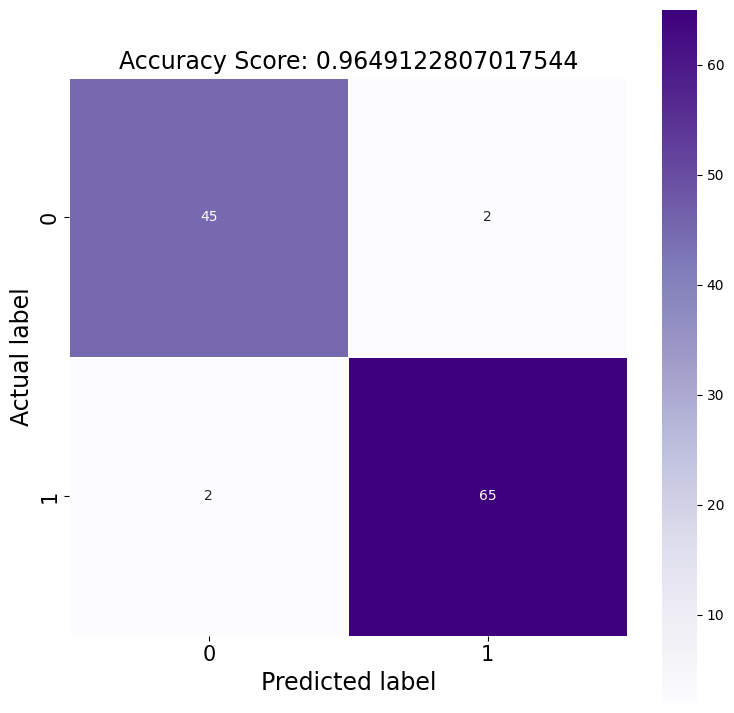

In [25]:
# Generate a confusion matrix
cm = metrics.confusion_matrix(y_test, clf.predict(X_test))

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Purples');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

**I'd say that is pretty good, but I am unsure how good these things should really be.**

In [48]:
# Generate a classification report
from sklearn.metrics import classification_report

# Generate predictions based on the test data set
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.97      0.97      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



Feature importance refers to the process of determining and quantifying the contribution of each feature (also known as predictor variable or attribute) in a machine learning model towards making accurate predictions. It helps in understanding which features have the most significant impact on the model's output and can be crucial for interpreting and explaining the model's behavior.

In logistic regression models, you can calculate feature importance by examining the coefficients associated with each feature. These coefficients indicate the change in the log-odds of the target variable for a one-unit change in the corresponding feature, while keeping other features constant. The magnitude of the coefficient reflects the strength of the impact that the feature has on the predicted outcome.

The magnitude of the coefficients indicates the importance of each feature. Larger magnitudes imply a stronger impact on the predicted probability of the positive class.

**Positive Coefficient**: An increase in the feature value leads to an increase in the log-odds of the positive class, implying a higher probability of belonging to the positive class.

**Negative Coefficient**: An increase in the feature value leads to a decrease in the log-odds of the positive class, implying a lower probability of belonging to the positive class.

Remember that the scale of the features matters when interpreting coefficients. If features are on different scales, their coefficients won't be directly comparable. This is where normalization can be helpful. Also, keep in mind that this interpretation assumes a linear relationship between the features and the log-odds of the target variable. If your logistic regression model includes interactions or polynomial terms, the interpretation can become more complex. Additionally, be cautious about interpreting coefficients as causal relationships, as logistic regression only captures associations, not causal effects.

Here are your tasks:

1. Extract the model coefficients from your trained model.
2. Normalize the coefficients by the standard deviation of each feature in the training data.
3. Sort feature names and coefficients by absolute value of coefficients.
4. Visualize the feature importances by creating a horizontal bar chart using e.g. [barh](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.barh.html). Based on magnitude, what appears to be the most important predictor of cancer in this dataset?

In [49]:
# Extract coefficients

# clf.coef_[0] has an ugly array result that is hard to read without looking elsehwere.
# Let's gather these with the context of the feature/column for easier human consumption

# Create a DataFrame with feature names and coefficients
# My intent is to develop an easier to use library here that I can copy into the first cell of all Jupyter Notebooks
# Hacking this together for now for future library or at least future super-starter-cell
def getPrettyCoefficientsTable(feature_names, clf):
    return pd.DataFrame({
        'feature': feature_names,
        'coefficient': clf.coef_[0]
    })

coef_df = getPrettyCoefficientsTable(raw.feature_names, clf)
coef_df

,feature,coefficient
0,mean radius,-0.329489
1,mean texture,-0.485553
2,mean perimeter,-0.322260
3,mean area,-0.410151
4,mean smoothness,-0.185330
5,mean compactness,0.451203
6,mean concavity,-0.681083
7,mean concave points,-0.851236
8,mean symmetry,-0.338582
9,mean fractal dimension,0.198550


In [50]:
# Normalize the coefficients by the standard deviation

def getPrettyCoefficientsTableNormalized(scaler, feature_names, model):
    return pd.DataFrame({
      'feature': feature_names,
      'coefficient': model.coef_[0],
      'std_dev': scaler.scale_, # This contains the std dev for each feature
      'normalized_coefficient': model.coef_[0] * scaler.scale_
  })


norm_coef_df = getPrettyCoefficientsTableNormalized(scaler, raw.feature_names, clf)
norm_coef_df


,feature,coefficient,std_dev,normalized_coefficient
0,mean radius,-0.329489,3.531487,-1.163586
1,mean texture,-0.485553,4.154390,-2.017175
2,mean perimeter,-0.322260,24.286279,-7.826507
3,mean area,-0.410151,357.772373,-146.740779
4,mean smoothness,-0.185330,0.013784,-0.002555
5,mean compactness,0.451203,0.050434,0.022756
6,mean concavity,-0.681083,0.077716,-0.052931
7,mean concave points,-0.851236,0.038555,-0.032819
8,mean symmetry,-0.338582,0.027368,-0.009266
9,mean fractal dimension,0.198550,0.006811,0.001352


I had to look all of this up. Was thinking of doing this math manually but was clued into the fact that the scaler has this informaton.

In [51]:
# Sort feature names and coefficients by absolute value of coefficients
norm_coef_df.sort_values(by='normalized_coefficient', key=abs, ascending=False, inplace=True)
norm_coef_df

,feature,coefficient,std_dev,normalized_coefficient
23,worst area,-0.922042,585.750909,-540.087000
3,mean area,-0.410151,357.772373,-146.740779
13,area error,-1.000870,47.677941,-47.719428
22,worst perimeter,-0.770815,33.831948,-26.078181
2,mean perimeter,-0.322260,24.286279,-7.826507
21,worst texture,-1.037419,6.093924,-6.321953
20,worst radius,-0.932539,4.885176,-4.555615
1,mean texture,-0.485553,4.154390,-2.017175
12,perimeter error,-0.856898,2.035513,-1.744227
0,mean radius,-0.329489,3.531487,-1.163586


I am not totally sure what this means, but I think that the area and perimeter values are strong influences on the outcome. Top 4 really, after that, far less influence.

Also, th "worst" values seem to generally be favored more than the "average" version. There was high coorelation I thought from before. That doesn't.. not make intuitive sense but then again, one of the purposes of ML is to gather insights that are non-obvious.

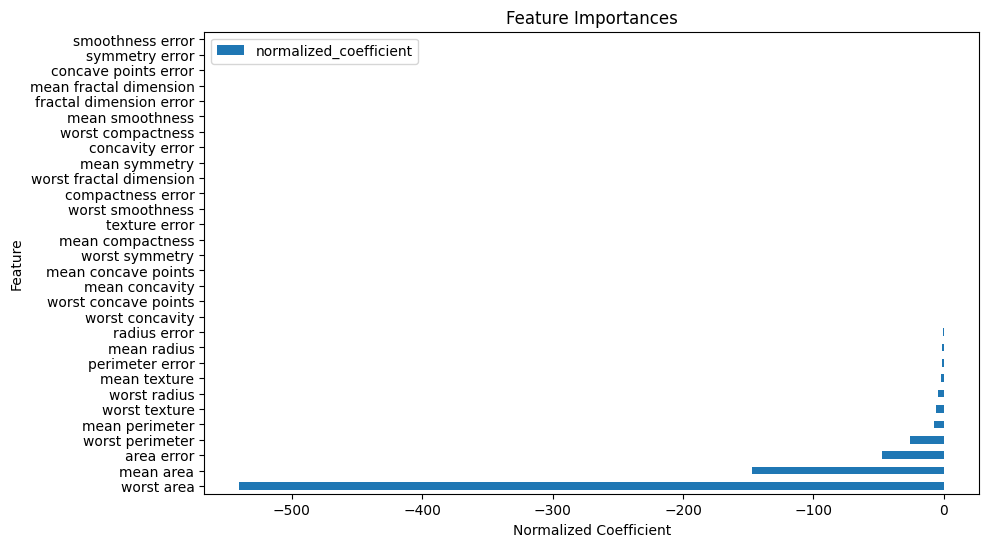

In [53]:
# Visualize feature importances

def plotFeatureImportance(coefs):
  coefs.plot(kind='barh', x='feature', y='normalized_coefficient', figsize=(10, 6))
  plt.xlabel('Normalized Coefficient')
  plt.ylabel('Feature')
  plt.title('Feature Importances')

plotFeatureImportance(norm_coef_df)

# Assignment Conclusions
This was a good exercise, and also nice to work with clean data this time to actually do something, unrealistic - I know.

The questions I have for this are, this coef plot suggests that there are ~5 contributers using this regression model that carry most of the predictive weight. Do the rest have value, with such low coefficients?
I suppose I could test this if time permits by training a second model only on those top 5 or so features.

Is a 96% score good? Seems great but maybe we are in the 1 or 2 percent territory for what is a good predictive result.
Could it be that these 5 features will get you to, say, 94%, and then adding 25 more features gets you 96%? I did, as you can see, do a non-scaled version just to see what happens and it came in at ~94%. Is model tuning really just about finding what juice there is to squeeze by model selection, feature selection and engineering, etc?

---
# Overall thoughts

Coming from a python programming background of proceedural code, more object oriented than not, for products, this kind of coding is quite different since so many of those best practices that you take into account to make robust code doesn't matter here. You can hard code array values, sizes, it's fine, you're not writing a program that takes inputs and is expected to act on those inputs (good or bad) in a way that doesn't crash.

Here, it's kind of a single purpose script.

I do intend, perhaps optimistically with my time, to make a library to do a lot of this work the way I like it. Not sure if there is benefit there. If I was planning on doing this kind of work long term, I would consider learning all of the packages and methods and enumerated values and options to know things off the top of my head. Bt my goal in this coarse is to understand how this whole process works so that I can run these types of projects with my teams. So, a library might be nice for me here.